
# House Price Prediction using Machine Learning: 

Developing and Evaluating Models for King County, USA

A real estate company wants to predict the prices of houses in King County, USA, to assist their clients in making informed buying and selling decisions. The company has a dataset that contains information on various features of the houses, such as the number of bedrooms, bathrooms, floors, etc. as well as their corresponding prices. The business objective of the task above is to develop a machine learning model that can accurately predict house prices in King County, USA. This model can be used by real estate companies, property appraisers, and individuals to estimate the market value of a house based on its features such as the number of bedrooms, bathrooms, floors, etc. Having an accurate model can help with decision making for buying, selling, or valuing properties, which can have significant financial implications.

### Why is machine learning ideal for the task?

Machine learning is ideal for the task of house price prediction because it can analyze a large dataset with multiple variables to identify patterns and relationships that can be used to make accurate predictions. In this specific task, there are 18 features that can potentially influence the house prices, and manually determining the impact of each feature can be time-consuming and challenging. Machine learning models can be trained to automatically learn and understand these relationships, and provide accurate predictions for new data. Additionally, machine learning models can be improved over time with additional data, and can adapt to changing market conditions and trends, making them a useful tool for real estate professionals and homeowners.

### Is the probelm supervised, unsupervised or reinforcement learning?
 The problem is supervised learning. This is because the target variable, "house price," is included in the dataset, and the goal is to predict house prices using various features in the dataset. Supervised learning involves predicting a target variable based on input features and a labeled dataset, which is exactly what is being done in this case.

 It is a regression problem since the target variable, i.e., the house price, is a continuous variable. The goal is to predict the price of a house based on the given features, which makes it a regression problem.


For the specific problem of predicting house prices using the King County dataset, I am going to use batch learning since the the dataset is not too large and can fit into memory. In batch learning, the system is trained on the entire dataset at once, and the model is updated based on the complete set of training data. Batch learning is generally more suitable when the dataset is relatively small and the computational resources are sufficient to process the entire dataset in memory. In online learning, the model is trained incrementally on small subsets of the dataset, or even on individual samples. 




In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px

from sklearn import set_config

# to scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# linear regression
from sklearn.linear_model import LinearRegression

# to avoid warnings 
import warnings
warnings.filterwarnings('ignore')



set_config(display="diagram")

## Loading the the data

In [32]:
# READ IN THE DATA
house_price_df = pd.read_csv('input/houseprice_data 2.csv')

#copy the data  
house_price_df_copy = house_price_df.copy()

# DISPLAY THE DATA
house_price_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

# Dataset and Features

The dataset used in this project is called "houseprice_data.csv" and is used for house price prediction in King County, USA. It contains 18 features, including:
<table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>price</td>
      <td>Price of the house</td>
    </tr>
    <tr>
      <td>bedrooms</td>
      <td>Number of bedrooms in the house</td>
    </tr>
    <tr>
      <td>bathrooms</td>
      <td>Number of bathrooms in the house</td>
    </tr>
    <tr>
      <td>sqft_living</td>
      <td>Square footage of the living area</td>
    </tr>
    <tr>
      <td>sqft_lot</td>
      <td>Square footage of the lot</td>
    </tr>
    <tr>
      <td>floors</td>
      <td>Number of floors in the house</td>
    </tr>
    <tr>
      <td>waterfront</td>
      <td>Whether the house is located on a waterfront (1 if yes, 0 if no)</td>
    </tr>
    <tr>
      <td>view</td>
      <td>Number of times the house has been viewed</td>
    </tr>
    <tr>
      <td>condition</td>
      <td>Overall condition of the house (1-5)</td>
    </tr>
    <tr>
      <td>grade</td>
      <td>Overall grade given to the housing unit (1-13)</td>
    </tr>
    <tr>
      <td>sqft_above</td>
      <td>Square footage of house apart from basement</td>
    </tr>
    <tr>
      <td>sqft_basement</td>
      <td>Square footage of the basement</td>
    </tr>
    <tr>
      <td>yr_built</td>
      <td>Year the house was built</td>
    </tr>
    <tr>
      <td>yr_renovated</td>
      <td>Year when the house was renovated (0 if never)</td>
    </tr>
    <tr>
      <td>zipcode</td>
      <td>Zipcode of the house</td>
    </tr>
    <tr>
      <td>lat</td>
      <td>Latitude of the location of the house</td>
    </tr>
    <tr>
      <td>long</td>
      <td>Longitude of the location of the house</td>
    </tr>
    <tr>
      <td>sqft_living15</td>
      <td>Average square footage of the interior living space for the 15 nearest neighbors</td>
    </tr>
    <tr>
      <td>sqft_lot15</td>
      <td>Average square footage of the lot for the 15 nearest neighbors</td>
    </tr>
  </tbody>
</table>


In [6]:
# CHECK THE DATA TYPES AND MISSING VALUES
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

The dataset used in this project is complete and does not contain any missing values.

In [174]:
# CHECK THE STATISTICAL SUMMARY OF THE DATA
house_price_df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.401822e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.673622e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

The summary statistics for the dataset are presented in table above. Overall, the data appears to be within reasonable bounds and there are no obvious outliers. The average price of a house in the dataset is `$75,000`,  with a standard deviation of $367,362.2, indicating that there is a significant amount of variability in house prices. The minimum and maximum prices are $75,000 and $7,700,000, respectively.

The majority of houses in the dataset have 3 bedrooms and 2.25 bathrooms. The average size of a house in the dataset is 2,080 square feet, with a standard deviation of 918 square feet. The minimum and maximum sizes are 370 square feet and 13,540 square feet, respectively.

The distribution of floors in the dataset is skewed towards single-story houses, with the majority of houses having only one floor. The majority of houses are not located on a waterfront, and the majority have not been viewed by potential buyers. The average condition of the houses in the dataset is 3.41, on a scale from 1 to 5, with a standard deviation of 0.65.

The average grade of a house in the dataset is 7.65, on a scale from 1 to 13, with a standard deviation of 1.17. The distribution of grades is skewed towards lower values, indicating that the majority of houses in the dataset are of average or below-average quality.

The average year built of the houses in the dataset is 1971, with a standard deviation of 29 years. The oldest house in the dataset was built in 1900, and the most recent was built in 2015. The average year of renovation is 84 years after the house was built, with a standard deviation of 402 years.

The majority of houses in the dataset are located in the zip codes 98004, 98103, 98005, 98033, and 98040. The average latitude of the houses in the dataset is 47.56, with a standard deviation of 0.14, and the average longitude is -122.21, with a standard deviation of 0.14.

The average size of the nearest 15 neighbors for a given house in the dataset is 1,986 square feet, with a standard deviation of 687 square feet. The average size of the lot for the nearest 15 neighbors is 12,028 square feet, with a standard deviation of 26,317 square feet.


# Visualizing the dataset using a map

Visualizing the dataset using a map with latitude and longitude helps to see the spatial distribution of the houses in the dataset. This visualization provides a quick overview of the data and can reveal any patterns or trends that may be useful in the analysis. For example, the map may show that house prices are higher in certain areas, which could indicate that location is an important factor in predicting house prices. Additionally, a map visualization can help identify any outliers or data errors in the dataset, such as houses that have incorrect or missing location data.

<AxesSubplot: xlabel='long', ylabel='lat'>

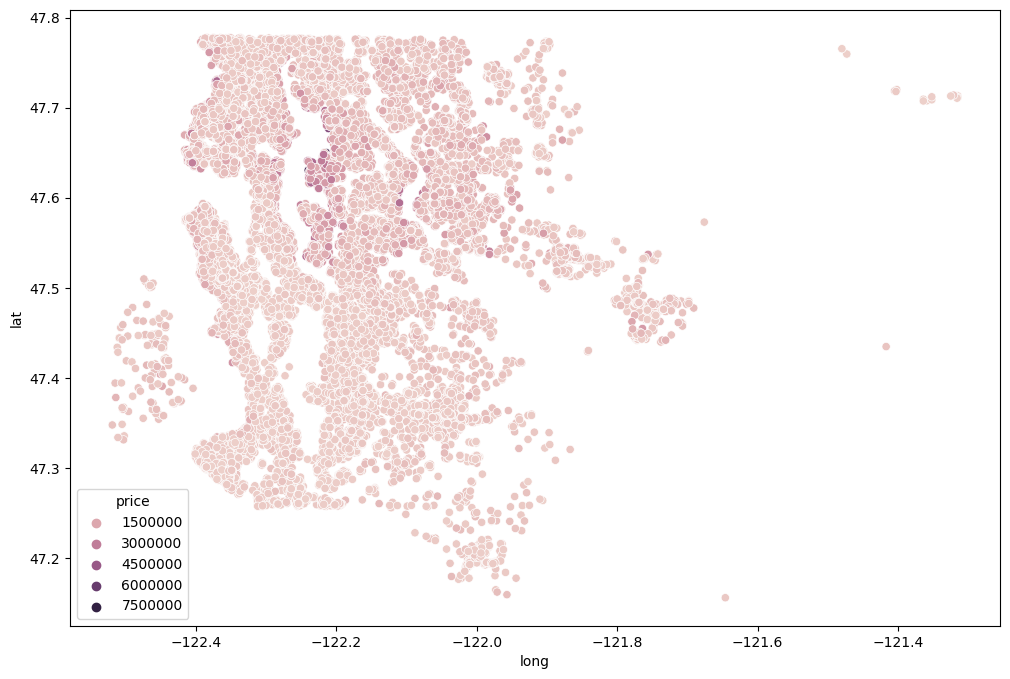

In [14]:
# VISUALIZE THE LOCATION OF THE HOUSES USING LATITUDE AND LONGITUDE
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=house_price_df,hue='price')

In [15]:
# VISUALIZE THE PRICE OF THE HOUSES USING HEATMAP   
fig = px.density_mapbox(house_price_df_copy, lat='lat', lon='long', z='price', radius=10,
                        center=dict(lat=house_price_df_copy['lat'].mean(), lon=house_price_df_copy['long'].mean()), zoom=10,
                        mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()


<ul>
  <li>The map visualization shows the location of houses in the Seattle area.</li>
  <li>By using the hue parameter, we can see that the house prices tend to increase as we move towards the center of the city.</li>
  <li>On the other hand, the houses located in the outskirts of the city tend to be cheaper.</li>
</ul>


In [17]:
# VISUALIZE THE NUMBER OF BEDROOMS IN THE HOUSES USING HEATMAP
fig = px.density_mapbox(house_price_df_copy, lat='lat', lon='long', z='bedrooms', radius=10,

                        center=dict(lat=house_price_df_copy['lat'].mean(), lon=house_price_df_copy['long'].mean()), zoom=10,    

                        mapbox_style="stamen-terrain")
fig.show()

<ul>
  <li>We can see that most of the houses have 3 bedrooms.</li>
  <li>Followed by 4 bedrooms.</li>
  <li>The houses with a lot of bedrooms are few.</li>
</ul>


In [19]:
# VISUALIZE THE NUMBER OF BATHROOMS IN THE HOUSES USING HEATMAP
fig = px.density_mapbox(house_price_df_copy, lat='lat', lon='long', z='bathrooms', radius=10,
                        center=dict(lat=house_price_df_copy['lat'].mean(), lon=house_price_df_copy['long'].mean()), zoom=10,    
                        mapbox_style="stamen-terrain")
fig.show()

Upon analyzing the bathroom feature of the dataset, we observe that the size of 2.50 has the highest occurrence with 5380, followed by 1.0 with 3852, and 1.25 has the least. This indicates that most houses have at least one bathroom with a size of either 1.0 or 2.50, while houses with a bathroom size of 1.25 are relatively uncommon.

In [23]:
# VISUALIZE THE NUMBER OF FLOORS IN THE HOUSES USING HEATMAP
fig = px.density_mapbox(house_price_df_copy, lat='lat', lon='long', z='floors', radius=10,


                        center=dict(lat=house_price_df_copy['lat'].mean(), lon=house_price_df_copy['long'].mean()), zoom=10,    

                        mapbox_style="stamen-terrain")
fig.show()

<li>The majority of the houses in the dataset have a single floor.</li>

Obsevations of each feature from the Map visualization
<ul>
  <li>We can see that most of the houses do not have a view.</li>
  <li>We can see that most of the houses have a grade of 7.</li>
  <li>We can see that most of the houses have a condition of 3.</li>
  <li>We can see that most of the houses do not have a waterfront.</li>
  <li>We can see that most of the houses have 2 bathrooms.</li>
  <li>We can see that most of the houses have 1 floor.</li>
  <li>We can see that most of the houses have a sqft living of 2000.</li>
</ul>

# Exploratory Data Analysis (EDA) 

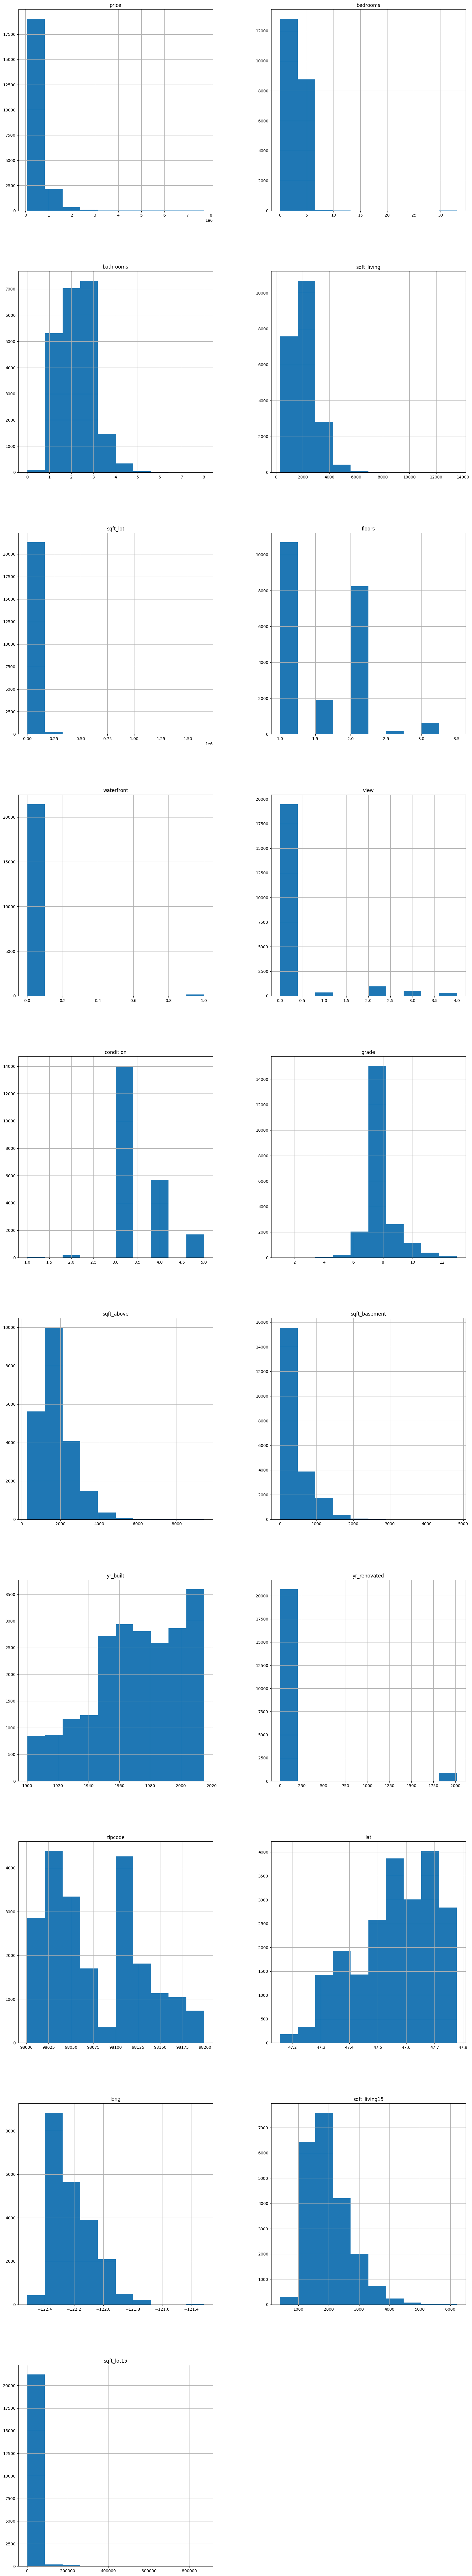

In [25]:
feature_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
house_price_df[feature_columns].hist(figsize=(20, 115), layout=(10, 2), bins=10)
plt.show()

<AxesSubplot: xlabel='bedrooms', ylabel='count'>

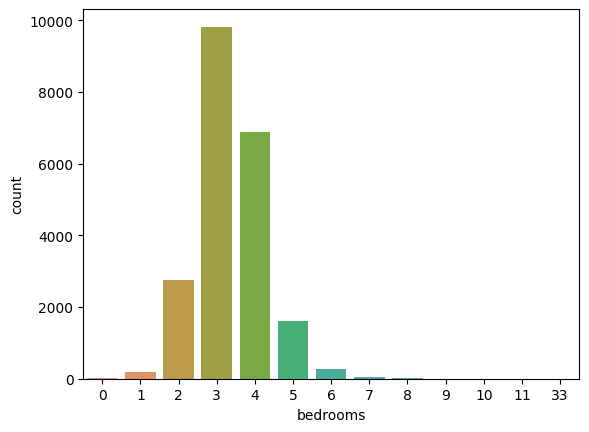

In [26]:

# VISUALIZE THE NUMBER OF HOUSES IN EACH BEDROOM CATEGORY
sns.countplot(x='bedrooms',data=house_price_df)

/var/folders/nq/zbsywqv94hq7dy3hw12t50yr0000gn/T/ipykernel_17926/4193494243.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='price', ylabel='Density'>

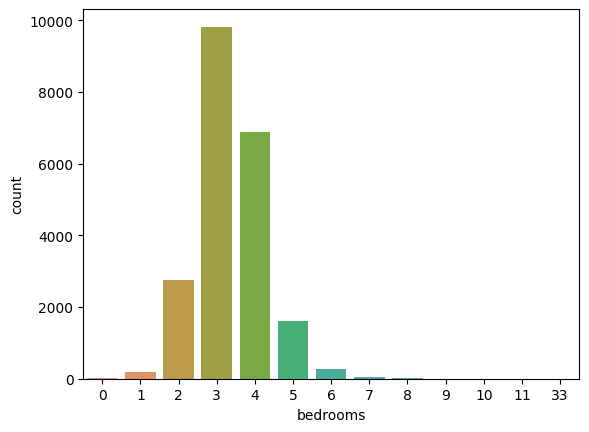

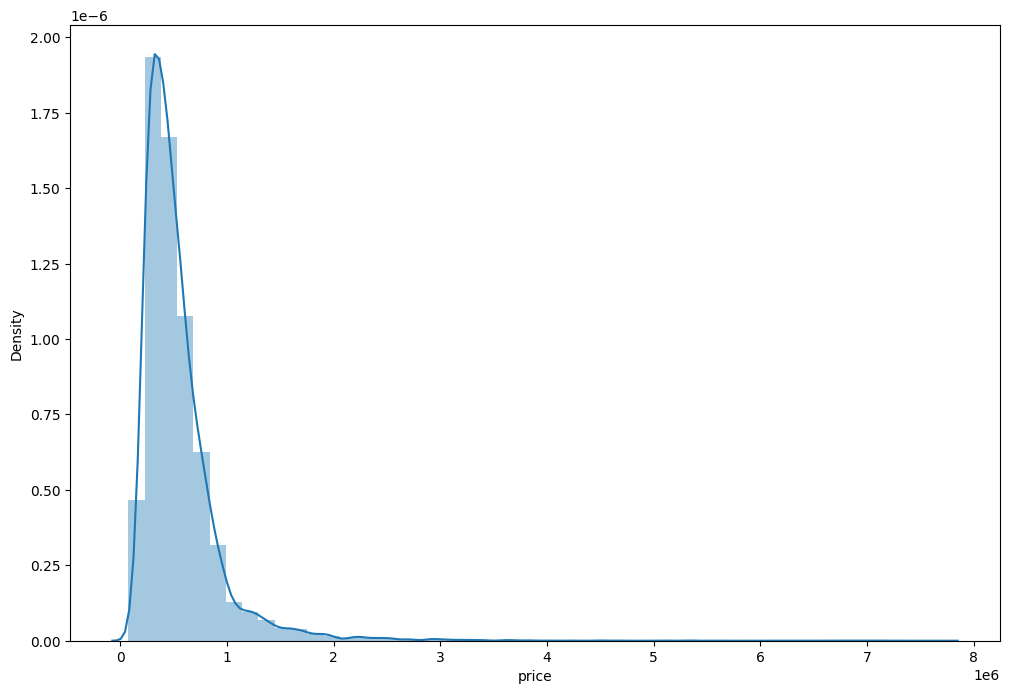

In [27]:

# VISUALIZE THE NUMBER OF BEDROOMS IN THE HOUSES
sns.countplot(x='bedrooms',data=house_price_df)


# VISUALIZE THE PRICE OF THE HOUSES
plt.figure(figsize=(12,8))
sns.distplot(house_price_df['price'],bins=50)


We can see that the price of the houses is right skewed. it means that the majority of the houses have lower prices, and a few houses have much higher prices. This can be seen in the distribution plot where the tail of the plot extends towards the higher prices. The mean price of the houses will be higher than the median price, indicating the presence of outliers with much higher prices. It is important to note this when selecting an appropriate model for prediction as a model that assumes a normal distribution may not perform well on a skewed distribution.

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

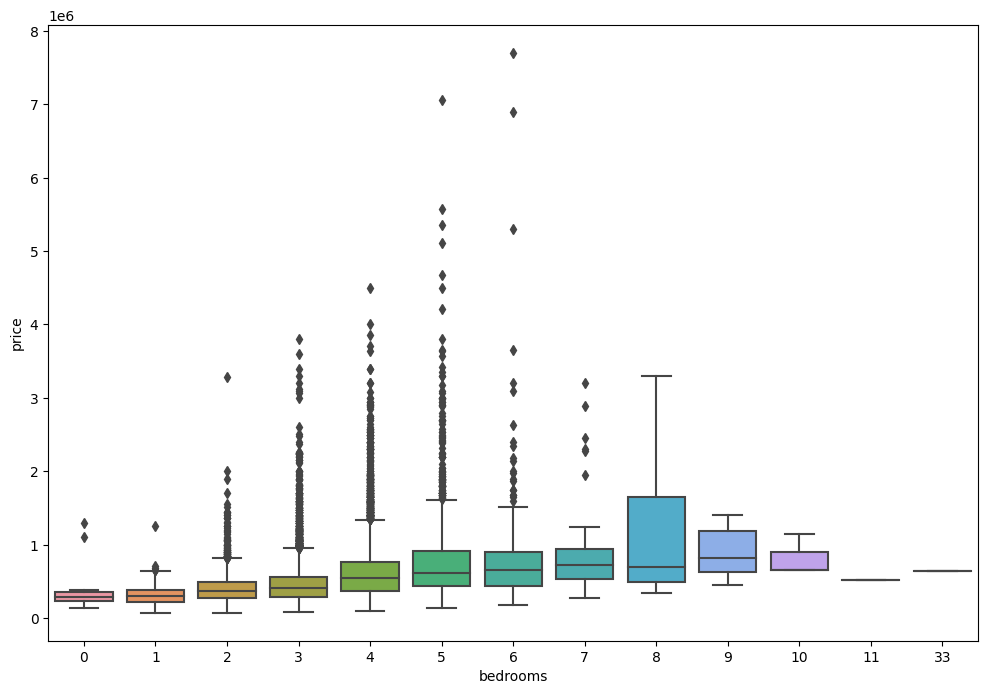

In [30]:

# VISUALIZE THE PRICE OF THE HOUSES BASED ON THE NUMBER OF BEDROOMS
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=house_price_df)


<AxesSubplot: xlabel='bathrooms', ylabel='price'>

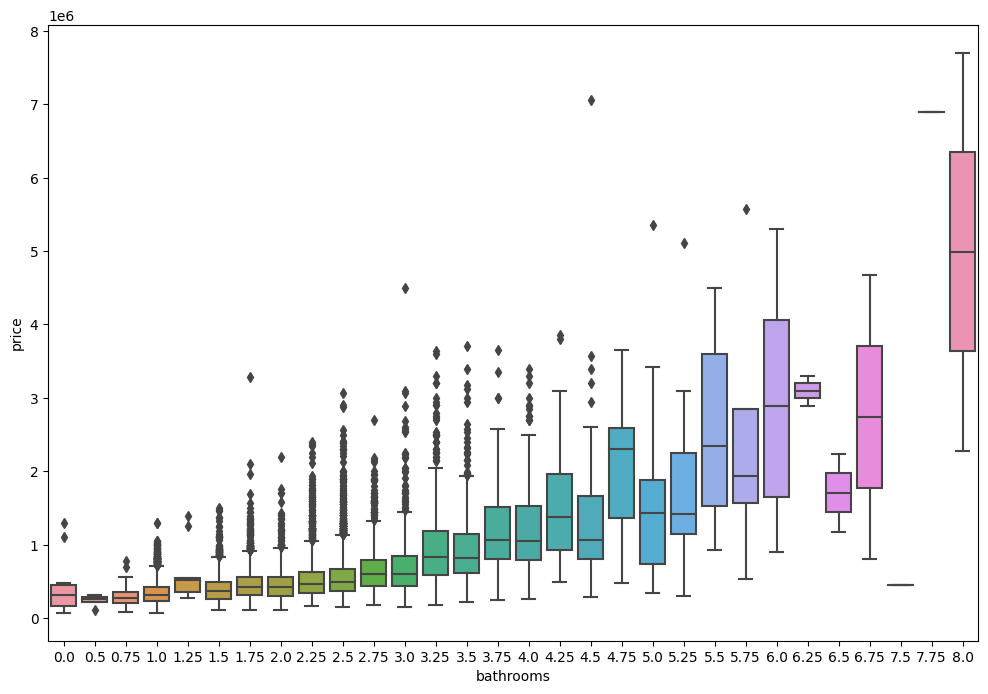

In [29]:
# VISUALIZE THE PRICE OF THE HOUSES BASED ON THE NUMBER OF BATHROOMS
plt.figure(figsize=(12,8))
sns.boxplot(x='bathrooms',y='price',data=house_price_df)

The box plot shows that the median price for houses with 8 bathrooms is higher than the median price for houses with other values of the bathroom feature, it suggests that houses with 8 bathrooms have higher prices on average. Similarly, the box plot shows that the height of the box for houses with 0 - 3.0  bathrooms are the lowest among all values of the bathroom feature, it suggests that houses without much bathrooms are generally cheaper than houses with 8 bathrooms. 
Since EDA  is just a summary of the data and may not tell the whole story. Further analysis is needed to fully understand the relationship between the bathroom feature and house prices. Let's look at the correlation value between the features.


## Correlation Matrix

The correlation matrix can be used to understand the relationships between the different features in our dataset.

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. The coefficient ranges from -1 to 1, with 1 indicating a perfect positive correlation, 0 indicating no correlation, and -1 indicating a perfect negative correlation.

In [20]:
house_price_df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308338   0.525134     0.702044  0.089655  0.256786   
bedrooms       0.308338  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525134  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702044  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089655  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256786  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266331 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397346  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036392  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667463  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605566  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323837  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.053982  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126442  0.018841   0.050739     0.055363  0.007644  0.006338   
zipcode       -0.053168 -0.152668  -0.203866    -0.199430 -0.129574 -0.059121   
lat            0.306919 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021571  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585374  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082456  0.029244   0.087175     0.183286  0.718557 -0.011269   

               waterfront      view  condition     grade  sqft_above  \
price            0.266331  0.397346   0.036392  0.667463    0.605566   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261190   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323837  0.053982      0.126442 -0.053168  0.306919   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051943  0.423898      0.023285 -0.261190 -0.000816   
sqft_basement       1.000000 -0.133124      

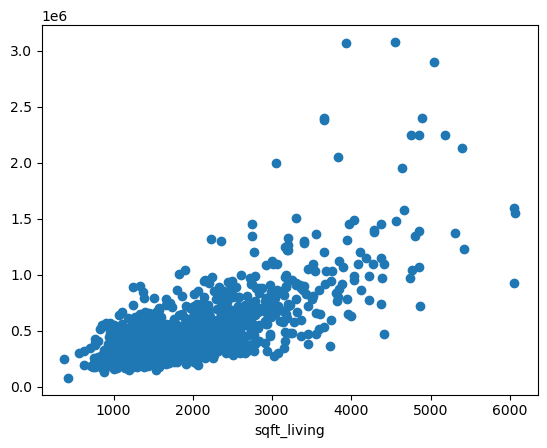

In [21]:
n_samples = 1000
_ = plt.scatter(house_price_df['sqft_living'][:n_samples], house_price_df['price'][:n_samples])
_ = plt.xlabel('sqft_living')

Some observations from the correlation matrix are:
<ul>
<li>The price of the house is strongly positively correlated with the number of bedrooms, the square footage of living area, the square footage above the ground, the grade of the house, and the square footage of living area in 2015.</li>
<li>The price of the house is weakly positively correlated with the number of bathrooms, the square footage of the lot, and the square footage of the lot in 2015.</li>
<li>The price of the house is weakly negatively correlated with the age of the house and the condition of the house.</li>
<li>The number of bedrooms is strongly positively correlated with the square footage of living area, the square footage above the ground, and the grade of the house.</li>
<li>The number of bathrooms is strongly positively correlated with the number of bedrooms and the square footage of living area.</li>
<li>The square footage of living area is strongly positively correlated with the square footage above the ground and the grade of the house.</li>
<li>The square footage of the lot is weakly positively correlated with the square footage of the lot in 2015.</li>
<li>The square footage of living area in 2015 is strongly positively correlated with the square footage above the ground and the grade of the house.</li>
</ul>


# Data Preprocessing

Data preprocessing is the process of cleaning and transforming raw data to make it suitable for analysis or machine learning models. It involves a series of steps that include data cleaning, data transformation, and data integration. Since data preprocessing is an important step in data analysis and machine learning, as the quality of the input data can greatly affect the accuracy and effectiveness of the analysis or model. Below are the tasks to be perform

<ul> 
     <li>Handling missing data:There are no missing values in the dataset.</li>
     <li>Handling categorical variables: All the variables in the dataset are numerical</li>
     <li>Feature scaling: We Scale the numerical variables to ensure that they are on the same scale. We can use techniques like standardization or normalization.</li>
     <li> Feature selection: Since We don't necessarily need to use all the 18 features in our machine learning model. I am going to select which features to use based on their correlation with the target variable (price) and their relevance to the problem I am  trying to solve. But other techniques tha can be used in this case 
is the feature selection techniques such as correlation analysis, stepwise regression, or principal component analysis (PCA) to determine which features to include in our model.</li>
<li>Train-test split: Split the data into a training set and a test set to evaluate the performance of the model.</li>
</ul>


I am going to create a pipeline to handle all these pre-process steps, a pipeline is a series of data preprocessing and model training steps that are executed in a specific sequence to transform the raw input data to a model-ready format. A pipeline typically involves several steps, such as data cleaning, feature engineering, feature selection, and model training.

### Why use pipeline?

<ul>
 <li>it can simplify the code and make it more modular and reusable.</li>
 <li>it can help ensure that all the steps are executed in the correct order and that the data is processed consistently across multiple runs.</li>
 <li> it can help to prevent data leakage, which can occur when information from the test set is inadvertently used during the training phase, leading to overly optimistic performance estimates.</li>
</ul>


In [58]:

# Create a pipeline for numerical features
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Create a column transformer to drop certain columns
drop_columns = ['price'] #,'sqft_living','yr_built','zipcode','long','yr_renovated','sqft_lot15']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipeline, [col for col in house_price_df.columns if col not in drop_columns])
    ])

# Combine preprocessor and model into a single pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [59]:
#display the pipeline   
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('model', LinearRegression())])

In [65]:
# Split the data into X and y
X = house_price_df.drop('price', axis=1)
y = house_price_df['price']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FIT THE MODEL
pipe.fit(X_train, y_train)

# PREDICT THE MODEL
y_pred = pipe.predict(X_test)

# EVALUATE THE MODEL
print('R2 score: ', r2_score(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))


AttributeError: 'StandardScaler' object has no attribute 'predict'

In [63]:
# Calculate the mean squared err
mse = mean_squared_error(house_price_df['price'], y_pred)
print('MSE: %.3f' % mse)

MSE: 40518022074.276


In [64]:

pipe = make_pipeline(StandardScaler())
X = pipe.fit_transform(data)
y = pipe.fit_transform(target.values.reshape(-1, 1))
pipe


Pipeline(steps=[('standardscaler', StandardScaler())])

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment 1

In [118]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [119]:
model.coef_

array([[-0.06946445,  0.0052558 , -0.01774335, -0.02914678,  0.1374541 ,
         0.13912653,  0.09410683,  0.26110591,  0.43839552,  0.21910528,
         0.25311221,  0.01228744]])

In [120]:
model.intercept_

array([-0.00201186])

In [121]:
mse = mean_squared_error(y_test, pred)
lin_mse = np.sqrt(mse)
score = r2_score(y_test, pred)
print(f"The mean square error of the Linear regression model on the test data is : {mse:.3f}")
print(f"The root mean square error of the Linear regression model on the test data is : {lin_mse:.3f}")
print(f"The r2 score of the Linear regression model on the test data is : {score:.3f}")

train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_lin_mse = np.sqrt(train_mse)
train_score = r2_score(y_train, train_pred)
print(f"The mean square error of the Linear regression model on the train data is : {train_mse:.3f}")
print(f"The root mean square error of the Linear regression model on the train data is : {train_lin_mse:.3f}")
print(f"The r2 score of the Linear regression model on the train data is : {train_score:.3f}")

The mean square error of the Linear regression model on the test data is : 0.369
The root mean square error of the Linear regression model on the test data is : 0.607
The r2 score of the Linear regression model on the test data is : 0.671
The mean square error of the Linear regression model on the train data is : 0.325
The root mean square error of the Linear regression model on the train data is : 0.570
The r2 score of the Linear regression model on the train data is : 0.665


# Experiment 2

In [122]:
lin_reg = make_pipeline(StandardScaler(),
                                  LinearRegression())
scoring = ['neg_mean_squared_error' , 'r2']
cv_results_lin = cross_validate(lin_reg, data, target,
                            cv=10, scoring=scoring,
                            return_train_score=True)
cv_results_lin = pd.DataFrame(cv_results_lin)
cv_results_lin

fit_time  score_time  test_neg_mean_squared_error  \
0  0.030198    0.003839                -4.820253e+10   
1  0.012411    0.005700                -5.361935e+10   
2  0.013111    0.002964                -4.107664e+10   
3  0.010689    0.003044                -5.633228e+10   
4  0.010987    0.002830                -3.997006e+10   
5  0.009989    0.003500                -4.137293e+10   
6  0.009156    0.001814                -4.050371e+10   
7  0.009022    0.002097                -4.293361e+10   
8  0.009516    0.002244                -4.515917e+10   
9  0.055518    0.002703                -4.389462e+10   

   train_neg_mean_squared_error   test_r2  train_r2  
0                 -4.465560e+10  0.667130  0.666368  
1                 -4.406679e+10  0.661339  0.667039  
2                 -4.544238e+10  0.646654  0.668354  
3                 -4.376068e+10  0.657910  0.667550  
4                 -4.556345e+10  0.636828  0.669023  
5                 -4.541076e+10  0.665898  0.666521  
6                 -4.550831e+10  0.669944  0.666134  
7                 -4.525175e+10  0.673522  0.665621  
8                 -4.498641e+10  0.665497  0.666623  
9                 -4.517826e+10  0.683907  0.663309

In [123]:
test_mse_lin = cv_results_lin['test_neg_mean_squared_error'].mean()
test_rmse_lin = np.sqrt(-test_mse_lin)
test_r2_lin = cv_results_lin['test_r2'].mean()
print(f"The mean square error of the Linear regression model on the test data after 10 CV is : {test_mse_lin:.3f}")
print(f"The root mean square error of the Linear regression model on the test data after 10 CV is : {test_rmse_lin:.3f}")
print(f"The r2 score of the Linear regression model on the test data after 10 CV is: {test_r2_lin:.3f}")

train_mse_lin = cv_results_lin['train_neg_mean_squared_error'].mean()
train_rmse_lin = np.sqrt(-train_mse_lin)
train_r2_lin = cv_results_lin['train_r2'].mean()
print(f"The mean square error of the Linear regression model on the train data after 10 CV is : {train_mse_lin:.3f}")
print(f"The root mean square error of the Linear regression model on the train data after 10 CV is : {train_rmse_lin:.3f}")
print(f"The r2 score of the Linear regression model on the train data after 10 CV is : {train_r2_lin:.3f}")


The mean square error of the Linear regression model on the test data after 10 CV is : -45306488946.841
The root mean square error of the Linear regression model on the test data after 10 CV is : 212853.210
The r2 score of the Linear regression model on the test data after 10 CV is: 0.663
The mean square error of the Linear regression model on the train data after 10 CV is : -44982439870.134
The root mean square error of the Linear regression model on the train data after 10 CV is : 212090.641
The r2 score of the Linear regression model on the train data after 10 CV is : 0.667


In [124]:
errors_linear_df = pd.DataFrame({
    'Model': 'Linear Regression',
    'Test MSE': test_mse_lin,
    'Test RMSE': test_rmse_lin,
    'Test R2': test_r2_lin,
    'Train MSE': train_mse_lin,
    'Train RMSE': train_rmse_lin,
    'Train R2': train_r2_lin
}, index=[0])
errors_linear_df

Model      Test MSE      Test RMSE   Test R2     Train MSE  \
0  Linear Regression -4.530649e+10  212853.209858  0.662863 -4.498244e+10   

      Train RMSE  Train R2  
0  212090.640694  0.666654

<AxesSubplot: >

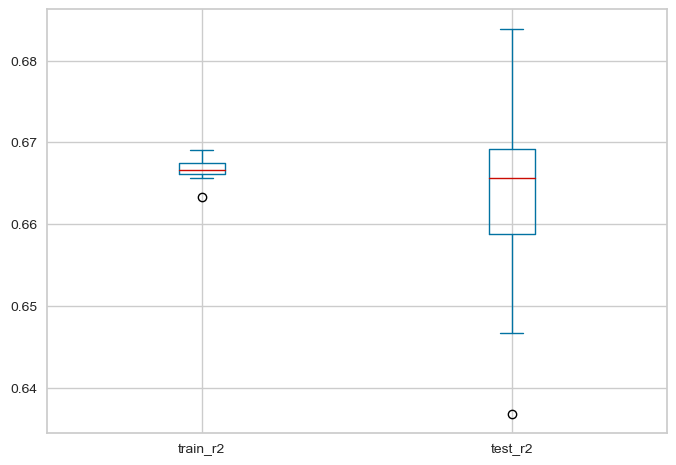

In [125]:
result = cv_results_lin[['train_r2', 'test_r2']]
result.plot(kind='box')

In [126]:
errors_linear_reg = pd.Series(cv_results_lin['test_r2']*100, name='errors_linear_reg')


# Experiment 3

### Polynomial Regression

In [127]:
from sklearn.preprocessing import PolynomialFeatures
poly_lin_reg = make_pipeline(PolynomialFeatures(degree=4),StandardScaler(),
                                  LinearRegression())
poly_lin_reg

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [128]:
scoring = ['neg_mean_squared_error' , 'r2']
cv_results_poly = cross_validate(poly_lin_reg, data, target,
                            cv=10, scoring=scoring,
                            return_train_score=True,
                            return_estimator=True)
cv_results_poly = pd.DataFrame(cv_results_poly)
cv_results_poly

fit_time  score_time                                          estimator  \
0  4.137535    0.050890  (PolynomialFeatures(degree=4), StandardScaler(...   
1  4.502695    0.038793  (PolynomialFeatures(degree=4), StandardScaler(...   
2  4.400401    0.036903  (PolynomialFeatures(degree=4), StandardScaler(...   
3  5.195755    0.036382  (PolynomialFeatures(degree=4), StandardScaler(...   
4  4.757965    0.037185  (PolynomialFeatures(degree=4), StandardScaler(...   
5  4.121848    0.034649  (PolynomialFeatures(degree=4), StandardScaler(...   
6  3.767289    0.038607  (PolynomialFeatures(degree=4), StandardScaler(...   
7  3.744141    0.033764  (PolynomialFeatures(degree=4), StandardScaler(...   
8  4.052258    0.033582  (PolynomialFeatures(degree=4), StandardScaler(...   
9  4.165259    0.033602  (PolynomialFeatures(degree=4), StandardScaler(...   

   test_neg_mean_squared_error  train_neg_mean_squared_error       test_r2  \
0                -9.075104e+25                 -1.566996e+10 -6.266953e+14   
1                -1.844439e+29                 -1.509153e+10 -1.164951e+18   
2                -4.531604e+25                 -1.555729e+10 -3.898142e+14   
3                -3.442536e+25                 -1.534137e+10 -2.090556e+14   
4                -6.258835e+20                 -1.550747e+10 -5.686844e+09   
5                -2.335362e+25                 -1.541721e+10 -1.885893e+14   
6                -7.768567e+21                 -1.515288e+10 -6.330430e+10   
7                -1.629580e+24                 -1.551523e+10 -1.239173e+13   
8                -1.206257e+24                 -1.528916e+10 -8.934990e+12   
9                -6.048162e+24                 -1.502492e+10 -4.355391e+13   

   train_r2  
0  0.882926  
1  0.885971  
2  0.886460  
3  0.883451  
4  0.887352  
5  0.886782  
6  0.888833  
7  0.885353  
8  0.886698  
9  0.888027

In [129]:

mse_poly = cv_results_poly['test_neg_mean_squared_error'].mean()
lin_mse_poly = np.sqrt(-mse_poly)
score_poly = cv_results_poly['test_r2']
print(f"The mean square error of the PolynomialFeatures of deg 2 with Linear regression model on the test data after 10 CV is : {mse_poly:.3f}")
print(f"The root mean square error of the PolynomialFeatures of deg 2 with Linear regression model on the test data after 10 CV is : {lin_mse_poly:.3f}")
print(f"The r2 score of the PolynomialFeatures of deg 2 with Linear regression model on the test data  after 10 CV is : {score_poly.mean():.3f} with a standard deviation of +/- {score_poly.std():.3f}")


train_mse_poly = cv_results_poly['train_neg_mean_squared_error'].mean()
train_lin_mse_poly = np.sqrt(-train_mse_poly)
train_score_poly = cv_results_poly['train_r2']
print(f"The mean square error of the PolynomialFeatures of deg 2 with Linear regression model on the train data after 10 CV is : {train_mse_poly:.3f}")
print(f"The root mean square error of the PolynomialFeatures of deg 2 with Linear regression model on the train data after 10 CVis : {train_lin_mse_poly:.3f}")
print(f"The r2 score of the PolynomialFeatures of deg 2 with Linear regression model on the train data  after 10 CV is : {train_score_poly.mean():.3f}  with a standard deviation of +/- {train_score_poly.std():.3f}")

The mean square error of the PolynomialFeatures of deg 2 with Linear regression model on the test data after 10 CV is : -18464663201562655842149335040.000
The root mean square error of the PolynomialFeatures of deg 2 with Linear regression model on the test data after 10 CV is : 135884742342776.125
The r2 score of the PolynomialFeatures of deg 2 with Linear regression model on the test data  after 10 CV is : -116643012629637168.000 with a standard deviation of +/- 368337946630540032.000
The mean square error of the PolynomialFeatures of deg 2 with Linear regression model on the train data after 10 CV is : -15356703046.298
The root mean square error of the PolynomialFeatures of deg 2 with Linear regression model on the train data after 10 CVis : 123922.165
The r2 score of the PolynomialFeatures of deg 2 with Linear regression model on the train data  after 10 CV is : 0.886  with a standard deviation of +/- 0.002


In [130]:

errors_poly_df = pd.DataFrame({
    'Model': 'Polynomial Regression',
    'Test MSE': mse_poly,
    'Test RMSE': lin_mse_poly,
    'Test R2': score_poly.mean(),
    'Train MSE': train_mse_poly,
    'Train RMSE': train_lin_mse_poly,
    'Train R2': train_score_poly.mean()
}, index=[0])
errors_poly_df

Model      Test MSE     Test RMSE       Test R2  \
0  Polynomial Regression -1.846466e+28  1.358847e+14 -1.166430e+17   

      Train MSE     Train RMSE  Train R2  
0 -1.535670e+10  123922.165274  0.886185

<AxesSubplot: title={'center': 'Polynomial Regression'}>

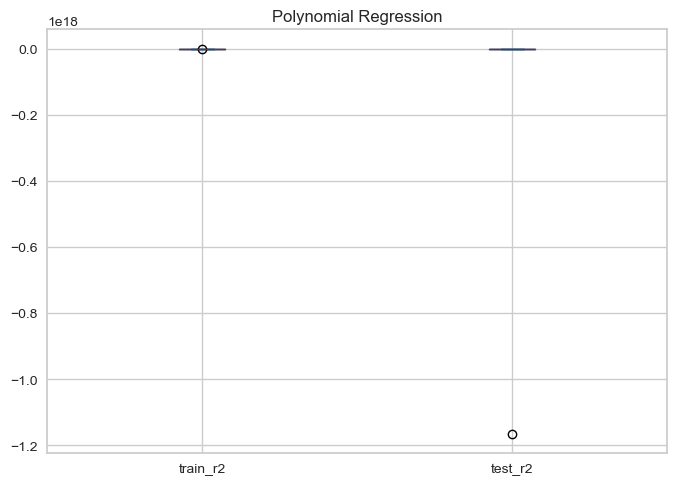

In [131]:

result = cv_results_poly[['train_r2', 'test_r2']]
result.plot(kind='box', title='Polynomial Regression')


In [132]:
errors_poly_reg = pd.Series(cv_results_poly['test_r2']*100, name='errors_poly_reg')

In [133]:
all_errors = pd.concat(
    [errors_linear_reg, errors_poly_reg],
    axis=1,
)
all_errors.describe()

errors_linear_reg  errors_poly_reg
count          10.000000     1.000000e+01
mean           66.286285    -1.166430e+19
std             1.336825     3.683379e+19
min            63.682778    -1.164951e+20
25%            65.876712    -3.446245e+16
50%            66.569742    -1.160716e+16
75%            66.924079    -9.799176e+14
max            68.390687    -5.686844e+11

Text(0.5, 1.0, 'Distribution of r2 error for Linear and Polynomial Regression')

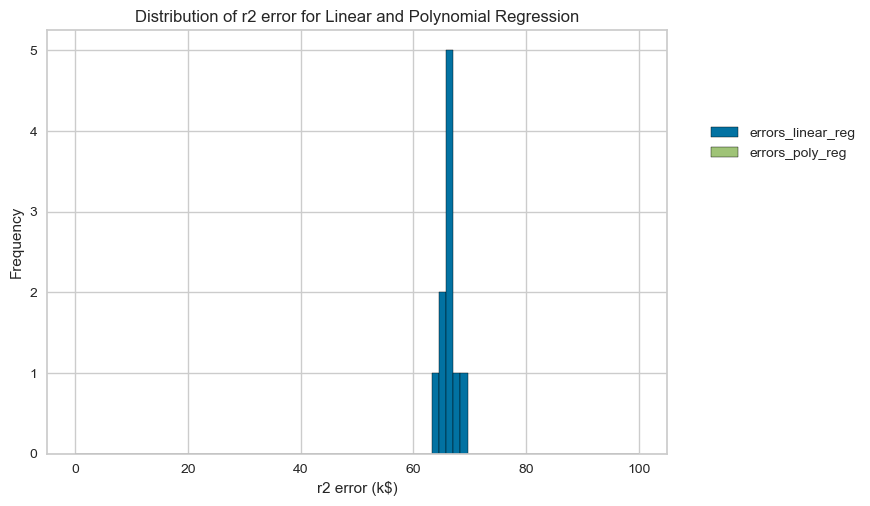

In [134]:
bins = np.linspace(start=0, stop=100, num=80)
all_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("r2 error (k$)")
plt.title("Distribution of r2 error for Linear and Polynomial Regression")

We see that the generalization performance of our Polynomial Features of degree 2 is better than Linear regression of degree 1.

# Experiment 4

#### Gradient Boosting

In [135]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(n_estimators=700)
cv_results_gbdt = cross_validate(
    gradient_boosting, data, target, scoring=scoring,
    n_jobs=2, return_estimator=True, return_train_score=True)

/Users/suleimanadebowaleojo/opt/anaconda3/envs/house_prediction/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[    3     3     2 ...     2     3     2]
 [ 5650  7242 10000 ...  1350  2388  1076]
 [    0     0     0 ...     0     0     0]
 ...
 [ 1180  2170   770 ...  1020  1600  1020]
 [    0   400     0 ...     0     0     0]
 [ 1340  1690  2720 ...  1020  1410  1020]] loaded from the file /var/folders/nq/zbsywqv94hq7dy3hw12t50yr0000gn/T/joblib_memmapping_folder_71960_d38bb20bad904e2e82f48a19b2576bdb_1263fd071997458ba05feadcb15134ea/71960-140376102098640-686fcf0c0a414143b8b0b4fca6dde204.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/suleimanadebowaleojo/opt/anaconda3/envs/house_pre

In [136]:

cv_results_gbdt = pd.DataFrame(cv_results_gbdt)
cv_results_gbdt

fit_time  score_time                                          estimator  \
0  13.620738    0.029803  ([DecisionTreeRegressor(criterion='friedman_ms...   
1  13.638501    0.030024  ([DecisionTreeRegressor(criterion='friedman_ms...   
2  13.567152    0.030586  ([DecisionTreeRegressor(criterion='friedman_ms...   
3  13.526771    0.030826  ([DecisionTreeRegressor(criterion='friedman_ms...   
4  13.551175    0.030430  ([DecisionTreeRegressor(criterion='friedman_ms...   

   test_neg_mean_squared_error  train_neg_mean_squared_error   test_r2  \
0                -2.610901e+10                 -1.113870e+10  0.827814   
1                -2.490886e+10                 -1.097683e+10  0.822600   
2                -2.286119e+10                 -1.113699e+10  0.804603   
3                -2.155463e+10                 -1.109644e+10  0.830428   
4                -2.509279e+10                 -1.115389e+10  0.817544   

   train_r2  
0  0.914827  
1  0.917811  
2  0.920090  
3  0.918949  
4  0.916805

In [137]:
mse_gbdt = cv_results_gbdt['test_neg_mean_squared_error'].mean()
lin_mse_gbdt = np.sqrt(-mse_gbdt)
score_gbdt = cv_results_gbdt['test_r2']
print(f"The mean square error score of our model on the test data is : {mse_gbdt:.3f}")
print(f"The root mean square error score of our model on the test data is : {lin_mse_gbdt:.3f}")
print(f"The r2 score of our model on the test data is : {score_gbdt.mean():.3f} with a standard deviation of +/- {score_gbdt.std():.3f}")

train_mse_gbdt = cv_results_gbdt['train_neg_mean_squared_error'].mean()
train_lin_mse_gbdt = np.sqrt(-train_mse_gbdt)
train_score_gbdt = cv_results_gbdt['train_r2']
print(f"The mean square error score of our model on the train data is : {train_mse_gbdt:.3f}")
print(f"The root mean square error score of our model on the train data is : {train_lin_mse_gbdt:.3f}")
print(f"The r2 score of our model on the train data is : {train_score_gbdt.mean():.3f}  with a standard deviation of +/- {train_score_gbdt.std():.3f}")

print(f"Average fit time: "
      f"{cv_results_gbdt['fit_time'].mean():.3f} seconds")
print(f"Average score time: "
      f"{cv_results_gbdt['score_time'].mean():.3f} seconds")

The mean square error score of our model on the test data is : -24105297912.235
The root mean square error score of our model on the test data is : 155258.809
The r2 score of our model on the test data is : 0.821 with a standard deviation of +/- 0.010
The mean square error score of our model on the train data is : -11100569819.933
The root mean square error score of our model on the train data is : 105359.242
The r2 score of our model on the train data is : 0.918  with a standard deviation of +/- 0.002
Average fit time: 13.581 seconds
Average score time: 0.030 seconds


<AxesSubplot: title={'center': 'Gradient Boosting'}>

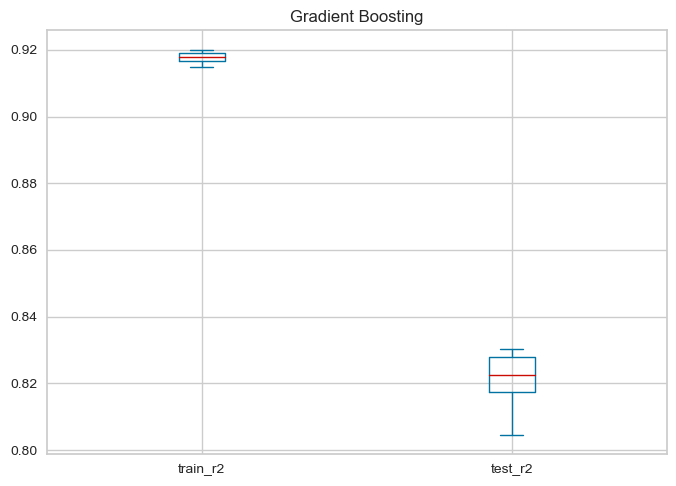

In [138]:

gbdt_result = cv_results_gbdt[['train_r2', 'test_r2']]
gbdt_result.plot(kind='box', title='Gradient Boosting')

In [139]:

errors_gbdt_df = pd.DataFrame({
    'Model': 'Gradient Boosting',
    'Test MSE': mse_gbdt,
    'Test RMSE': lin_mse_gbdt,
    'Test R2': score_gbdt.mean(),
    'Train MSE': train_mse_gbdt,
    'Train RMSE': train_lin_mse_gbdt,
    'Train R2': train_score_gbdt.mean()
}, index=[0])
errors_gbdt_df

Model      Test MSE      Test RMSE   Test R2     Train MSE  \
0  Gradient Boosting -2.410530e+10  155258.809451  0.820598 -1.110057e+10   

     Train RMSE  Train R2  
0  105359.24174  0.917696

In [140]:

errors_gbdt_reg = pd.Series(cv_results_gbdt['test_r2']*100, name='errors_gbdt_reg')

all_errors = pd.concat(
    [errors_linear_reg, errors_poly_reg, errors_gbdt_reg],
    axis=1,
)
all_errors.describe()


errors_linear_reg  errors_poly_reg  errors_gbdt_reg
count          10.000000     1.000000e+01         5.000000
mean           66.286285    -1.166430e+19        82.059784
std             1.336825     3.683379e+19         1.022095
min            63.682778    -1.164951e+20        80.460317
25%            65.876712    -3.446245e+16        81.754359
50%            66.569742    -1.160716e+16        82.260049
75%            66.924079    -9.799176e+14        82.781426
max            68.390687    -5.686844e+11        83.042771

Text(0.5, 1.0, 'Distribution of r2 error for Linear, Polynomial and Gradient Boosting Regression models on the test data')

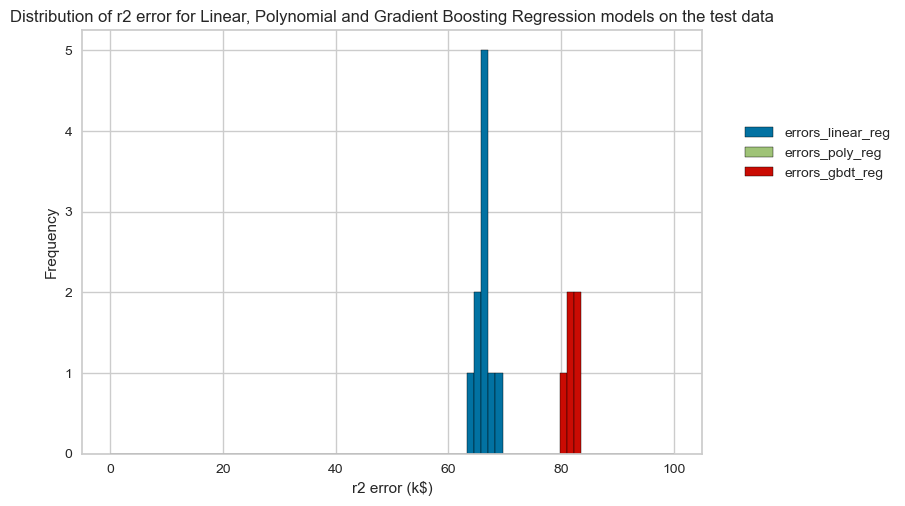

In [141]:
bins = np.linspace(start=0, stop=100, num=80)
all_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("r2 error (k$)")
plt.title("Distribution of r2 error for Linear, Polynomial and Gradient Boosting Regression models on the test data")

In [142]:
# best estimator
best_estimator = cv_results_gbdt['estimator'][np.argmax(cv_results_gbdt['test_r2'])]
best_estimator

GradientBoostingRegressor(n_estimators=700)

In [143]:
# use the best estimator to predict on the test data
y_pred = best_estimator.predict(X_test)

# Deployment 

In [144]:
# Save the model 
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(best_estimator, open(filename, 'wb'))


In [145]:
# load the model from disk
pickle.load(open(filename, 'rb'))


GradientBoostingRegressor(n_estimators=700)

In [146]:

#apply the model to the test data
y_pred = best_estimator.predict(X_test)

# calculate the mean absolute error of the model on the test data

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"The mean absolute error of the Gradient Boosting model on the test data is : {mae:.3f}")



The mean absolute error of the Gradient Boosting model on the test data is : 84235.513
